In [1]:
#Bibliotecas que precisam ser instaladas para a prática:
!pip install unidecode==1.2.0
!pip install wikipedia==1.4.0
!pip install spacy==2.2.4
!python -m spacy download en
!python -m spacy download pt

     |████████████████████████████████| 241 kB 19.8 MB/s 
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=9dd3b62dd82b90063ca5cc6724f9957a338639bee9c16425a52423a9281fd6b7
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
     |████████████████████████████████| 12.0 MB 24.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 21.2 MB 1.3 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=ab4661be74519a5d66d5800907ab5ff4d775e68165c5fed17f5acedd2dd969d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-_748jrmp/wheels/c3/f9/0c/5c014a36

# Expressões Regulares

- O Pacote que permite utilizar ER é <b>re</b>
- Existem vários métodos para utilizar expressões regulares em python., alguns deles para <b>buscar</b> padrões são:

|   Método   |                                      Descrição                                     |
|:----------:|:----------------------------------------------------------------------------------:|
| match()    | Determina se a RE combina com o início da string.                                  |
| search()   | Varre toda a string, procurando qualquer local onde esta RE tem correspondência.   |
| findall()  | Encontra todas as substrings onde a RE corresponde, e as retorna como uma lista.   |
| finditer() | Encontra todas as substrings onde a RE corresponde, e as retorna como um iterador. |

- Métodos para modificar strings:

| Método  | Descrição                                                                                            |
|---------|------------------------------------------------------------------------------------------------------|
| split() | Divide a string em uma lista, dividindo-a onde quer que haja correspondência com a RE                |
| sub()   | Encontra todas as substrings que correspondem com a RE e faz a substituição por uma string diferente |
| subn()  |  É o mesmo que o método sub(), mas retorna a nova string e o número de substituições                 |


Link: https://docs.python.org/pt-br/3.8/howto/regex.html

Agora vamos exemplificar cada um desses métodos:

In [2]:
import re

In [3]:
texto = "Vamos encontrar Padrões nesta string!! \nAgora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! \nBelo Horizonte, 2000-12-01."

In [4]:
print(texto)

Vamos encontrar Padrões nesta string!! 
Agora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! 
Belo Horizonte, 2000-12-01.


## Match
Determina se a RE combina com o início da string

In [5]:
re.match("Vamos", texto)

<re.Match object; span=(0, 5), match='Vamos'>

In [6]:
re.match("nesta", texto)

é case sensitive

In [7]:
re.match(r"vamos", texto)

## Search
Varre toda a string, procurando qualquer local onde esta RE tem correspondência

In [8]:
re.search("Vamos", texto)

<re.Match object; span=(0, 5), match='Vamos'>

In [9]:
re.search("encontrar", texto)

<re.Match object; span=(6, 15), match='encontrar'>

o default é case-sensitive

In [10]:
re.search("padrões", texto)

<re.Match object; span=(108, 115), match='padrões'>

In [11]:
re.search("Padrões", texto)

<re.Match object; span=(16, 23), match='Padrões'>

podemos ignorar case-sensitive

In [12]:
re.search("padrões", texto, re.IGNORECASE)

<re.Match object; span=(16, 23), match='Padrões'>

## Findall
Encontra todas as substrings onde a RE corresponde, e as retorna como uma lista

In [13]:
re.findall("Vamos", texto)

['Vamos', 'Vamos']

In [14]:
re.findall("padrões", texto)

['padrões']

re.I é igal re.IGNORECASE

In [15]:
re.findall("padrões", texto, re.I)

['Padrões', 'padrões']

In [16]:
#quando uso o + o padrão é 1 ou mais. Assim todas string que tem a no meio de outras letras  são retornadas
re.findall(r'\w+a\w+', texto)

['Vamos', 'encontrar', 'Padrões', 'Vamos', 'procurar', 'padrões']

In [17]:
#quando uso o * o padrão é 0 ou mais. Assim todas string que tem a no meio, ou no início ou no fim são retornadas
re.findall(r'\w*a\w*', texto)

['Vamos',
 'encontrar',
 'Padrões',
 'nesta',
 'Agora',
 'a',
 'nossa',
 'primeira',
 'prática',
 'Vamos',
 'aprender',
 'a',
 'procurar',
 'padrões']

## Finditer
Encontra todas as substrings onde a RE corresponde, e as retorna como um iterador.

In [18]:
re.finditer("Vamos", texto)

In [19]:
res = re.finditer("Vamos", texto)
[r for r in res]

[<re.Match object; span=(0, 5), match='Vamos'>,
 <re.Match object; span=(82, 87), match='Vamos'>]

In [20]:
re.finditer("padrões", texto)

In [21]:
re.finditer("padrões", texto, re.I)

## Split

In [22]:
re.split('\n',texto)

['Vamos encontrar Padrões nesta string!! ',
 'Agora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! ',
 'Belo Horizonte, 2000-12-01.']

In [23]:
type(texto)

str

In [24]:
texto.split("\s+")

['Vamos encontrar Padrões nesta string!! \nAgora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! \nBelo Horizonte, 2000-12-01.']

In [25]:
(re.split(r'\s+',texto))

['Vamos',
 'encontrar',
 'Padrões',
 'nesta',
 'string!!',
 'Agora',
 'é',
 'a',
 'nossa',
 'primeira',
 'prática',
 'de',
 'NLP!!',
 'Vamos',
 'aprender',
 'a',
 'procurar',
 'padrões!!',
 'Belo',
 'Horizonte,',
 '2000-12-01.']

## Sub

In [26]:
re.sub('\w+a\w+', 'a-word', texto)

'a-word a-word a-word nesta string!! \nAgora é a nossa primeira prática de NLP!! a-word aprender a a-word a-word!! \nBelo Horizonte, 2000-12-01.'

## Subn

In [27]:
re.subn('\w+a\w+', 'a-word', texto)

('a-word a-word a-word nesta string!! \nAgora é a nossa primeira prática de NLP!! a-word aprender a a-word a-word!! \nBelo Horizonte, 2000-12-01.',
 6)

## Exercícios

1. Escreva uma expressão regular para verificar se uma string contém apenas um determinado conjunto de caracteres (neste caso, a-z, A-Z e 0-9).

In [28]:
string1 = "ABCDEFabcdef123450"
string2 = "*&%@#!}{"

In [29]:
bool(re.search("[\w]", string1))

True

In [30]:
bool(re.search("[\W]", string2))

True

2. Escreva um expressão regular que corresponda a uma sequência que tenha um a seguido por um ou mais b's.

In [31]:
string1 = "abc"
string2 = "aacb"
string3 = "abbc"
string4 = "bb"

In [32]:
def check_re(texto):
  return bool (re.search("ab+", texto))

In [33]:
print(check_re(string1),
check_re(string2),
check_re(string3),
check_re(string4))

True False True False


3. Escreva uma expressão para dividir uma string em letras maiúsculas

In [34]:
string = "ExercídiosExpressãoRegularAA"

In [35]:
re.findall("[A-Z][^A-Z]*", string)

['Exercídios', 'Expressão', 'Regular', 'A', 'A']

4. Escreva uma expressão regular para remover a área de parênteses em uma string


- Amostra de Entrada: 
> * ["example (.br)", "w3resource", "github (.com)", "stackoverflow (.com)"] </br>
* Saída Esperada: 
> * example
> * w3resource
> * github
> * stackoverflow

In [36]:
strings = ["example (.br)", "w3resource", "github (.com)", "stackoverflow (.??)"]

In [37]:
[re.sub("\(.+\)",  ' ', palavra) for palavra in strings]

['example  ', 'w3resource', 'github  ', 'stackoverflow  ']

5. Recupere todos os "Twitter" da string abaixo

In [38]:
texto_exemplo_twitter = """This is a @test of some cool features that @mi_asd be @use-ful but @don't. look at this email@address.com. @bla! I like #nylas but I don't like to go to this apple.com?a#url. I also don't like the ### comment blocks. But #msft is cool."""
texto_exemplo_twitter

"This is a @test of some cool features that @mi_asd be @use-ful but @don't. look at this email@address.com. @bla! I like #nylas but I don't like to go to this apple.com?a#url. I also don't like the ### comment blocks. But #msft is cool."

In [43]:
re.findall(r'@[\w\-]+', texto_exemplo_twitter)

['@test', '@mi_asd', '@use-ful', '@don', '@address', '@bla']

6. Escreva uma expressão regular para remover as urls do texto:

- Para realizar pesquisas de artigos acadêmicos use o Google Scholar: https://scholar.google.com.br/
- Sempre mantenha seu linkedin atualizado: https://www.linkedin.com/ 

In [46]:
texto1 = "Para realizar pesquisas de artigos acadêmicos use o Google Scholar: https://scholar.google.com.br/"
texto2 = "Sempre mantenha seu linkedin atualizado: https://www.linkedin.com/"

In [44]:
def sub_re(texto):
  return re.sub(r'http\S+', '', texto)

In [48]:
print(sub_re(texto1) +  "\n"  + sub_re(texto2))

Para realizar pesquisas de artigos acadêmicos use o Google Scholar: 
Sempre mantenha seu linkedin atualizado: 


# Pré-processamento

In [49]:
import nltk
import wikipedia
import re
import spacy
from nltk.probability import FreqDist
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Definindo o corpus

Primeiramente, definimos o corpus que iremos trabalhar.

In [ ]:
# Caso o pacote wikipedia não funcione:
## Entre no link e faça downaload do arquivo https://drive.google.com/open?id=15R1jcugeM5SoGSPIPyG_6X6F3oMlxSBt
## Depois leia com o comando abaixo
#file = open("pln_wikipedia.txt", 'r')
#file_wiki = file.readlines()
#file.close()
#corpus = '\n'.join(file_wiki)

In [50]:
wikipedia.set_lang("pt")

In [51]:
pln = wikipedia.page("PLN")

In [52]:
corpus = pln.content

In [53]:
print(corpus)

Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.


== História ==
A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.
Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases 

In [55]:
print("O texto que estamos utilizando é da URL",pln.url)

O texto que estamos utilizando é da URL https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural


In [56]:
print(pln.content)

Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.


== História ==
A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.
Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases 

## Tokenização

Existem várias formas de realizar tokenização. 
1. Split()
2. Regex
3. NLTK
4. ...

### Split

1. Faça utilizando o método abaixo
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
str.split()
```

In [111]:
tokens_split = (re.split(r'\s+',corpus))
print(tokens_split)

['Processamento', 'de', 'língua', 'natural', '(PLN)', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação,', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais,', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural,', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural.', '==', 'História', '==', 

### Regex

2. Faça utilizando o método abaixo
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
```

In [112]:
import re
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
print(tokens_regex)

['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

### NLTK

3. Faça utilizando o método abaixo.
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
nltk.word_tokenize(corpus, language='portuguese')
```

In [113]:
import nltk
tokens_nltk = nltk.word_tokenize(corpus)
print(tokens_nltk)

['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

In [110]:
def plot_frequencia_tokens(tokens):
    fd_words = FreqDist(tokens)
    fd_words.plot(20)

### Plot das tokenizações

4. Plote o resultado de cada uma das tokenizações. 
Utilize o método <b> plot_frequencia_tokens() </b> para plotar o gráfico.
Também imprima o tamanho de cada tokenização

Tokens Split


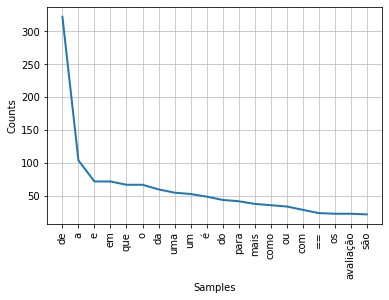

In [114]:
print("Tokens Split")
plot_frequencia_tokens(tokens_split)

Tokens Regex


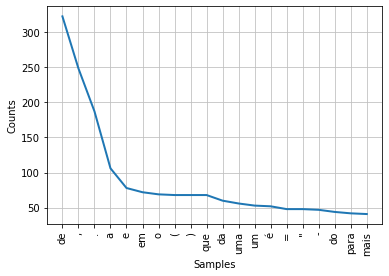

In [115]:
print("Tokens Regex")
plot_frequencia_tokens(tokens_regex)

Tokens NLTK


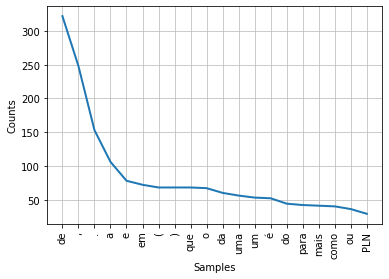

In [116]:
print("Tokens NLTK")
plot_frequencia_tokens(tokens_nltk)

## Capitalização

5. Traforme todos os tokens para minúsculo utilizando a função abaixo:

```python
str.lower()
```

In [118]:
tokens = str.lower(corpus)
tokens

'processamento de língua natural (pln) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. alguns desafios do pln são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.\n\n\n== história ==\na história do pln começou na década de 1950, quando alan turing publicou o artigo "computing machinery and intelligence", que propunha o que agora é chamado de teste de turing como critério de inteligência.\nem 1954, a experiência de georgetown envolveu a tradução automática de mais de sessenta f

 <b> <span style="color:red"> Lembre de utilizar a VARIÁVEL que contém o resultado da transformação anterior </span> </b>

## Remoção Stopwords

6. remova todas as stopwords retornadas pelo pacote NLTK da lista de tokens.

```python
portugues_stops = stopwords.words('portuguese')
```

Note que a variável "portugues_stops" é uma lista de palavras.

In [119]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
portugues_stops = stopwords.words('portuguese')

In [121]:
tokens_sem_stop = portugues_stops
print(tokens_sem_stop)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

## Remoção Números

7. remova todos os números, utilizando uma regex

```python
re.sub(__,__,__)
```

In [122]:
tokens_sem_numbers = re.sub(' \d+','', corpus)
tokens_sem_numbers

'Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.\n\n\n== História ==\nA história do PLN começou na década de, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.\nEm, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases russ

## Remoção Pontuação

8. remova todas as pontruações retornadas pelo pacote string da lista de tokens.

```python
string.punctuation
```

In [76]:
tokens_sem_punction = re.sub(r'[^\w\s]','',corpus)
tokens_sem_punction

'Processamento de língua natural PLN é uma subárea da ciência da computação inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais mais facilmente manipuláveis por programas de computador Alguns desafios do PLN são compreensão de língua natural fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural\n\n\n História \nA história do PLN começou na década de 1950 quando Alan Turing publicou o artigo Computing Machinery and Intelligence que propunha o que agora é chamado de teste de Turing como critério de inteligência\nEm 1954 a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases russas para 

## Remoção Acentos

9. remova todos os acentos utilizando a função abaixo:

```python
unidecode(str)
```

In [77]:
from unidecode import unidecode

In [81]:
tokens_sem_acentos = unidecode(corpus)
tokens_sem_acentos

'Processamento de lingua natural (PLN) e uma subarea da ciencia da computacao, inteligencia artificial e da linguistica que estuda os problemas da geracao e compreensao automatica de linguas humanas naturais. Sistemas de geracao de lingua natural convertem informacao de bancos de dados de computadores em linguagem compreensivel ao ser humano e sistemas de compreensao de lingua natural convertem ocorrencias de linguagem humana em representacoes mais formais, mais facilmente manipulaveis por programas de computador. Alguns desafios do PLN sao compreensao de lingua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geracao de lingua natural.\n\n\n== Historia ==\nA historia do PLN comecou na decada de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora e chamado de teste de Turing como criterio de inteligencia.\nEm 1954, a experiencia de Georgetown envolveu a traducao automatica de mais de sessenta f

10. Plote a frequência dos tokens sem acentos. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

In [84]:
def plot_frequencia_tokens(tokens):
    fd_words = FreqDist(tokens)
    fd_words.plot(20)

Tokens Split


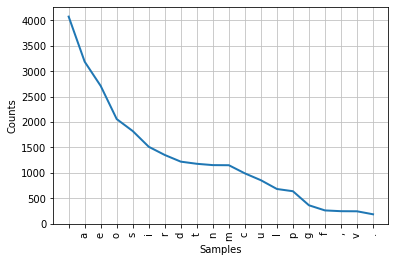

In [86]:
print("Tokens Split")
plot_frequencia_tokens(tokens_sem_acentos)

## Stemming

Iremos utilizar o stemming da biblioteca NLTK. O algoritmo disponível para este procedimento em portugês é o RSLPStemmer.

```python
stemmer = nltk.stem.RSLPStemmer()
```

11. Aplique o stemmer em cada elemento da lista de tokens.


In [89]:
stemmer = nltk.stem.RSLPStemmer()
tokens_stemmer = stemmer.stem(tokens_sem_acentos)
tokens_stemmer

'processamento de lingua natural (pln) e uma subarea da ciencia da computacao, inteligencia artificial e da linguistica que estuda os problemas da geracao e compreensao automatica de linguas humanas naturais. sistemas de geracao de lingua natural convertem informacao de bancos de dados de computadores em linguagem compreensivel ao ser humano e sistemas de compreensao de lingua natural convertem ocorrencias de linguagem humana em representacoes mais formais, mais facilmente manipulaveis por programas de computador. alguns desafios do pln sao compreensao de lingua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geracao de lingua natural.\n\n\n== historia ==\na historia do pln comecou na decada de 1950, quando alan turing publicou o artigo "computing machinery and intelligence", que propunha o que agora e chamado de teste de turing como criterio de inteligencia.\nem 1954, a experiencia de georgetown envolveu a traducao automatica de mais de sessenta f

12.  Plote a frequência dos tokens após o processo de stemming. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

Tokens Stemmer


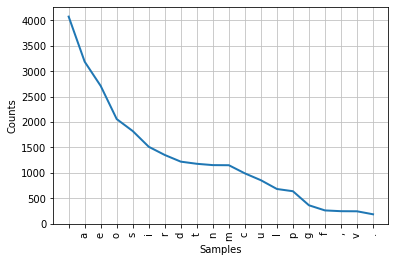

In [90]:
print("Tokens Stemmer")
plot_frequencia_tokens(tokens_stemmer)

## Lemmatization
13. Aplique a lematização
a biblitoteca NLTK não possui lematização para português.
Mas a scpaCy possui.

In [91]:
import pt_core_news_sm


In [92]:
#carrega o modelo para português
nlp = pt_core_news_sm.load()

A primeira etapa para executar a lematização é transformar a lista de tokens para uma string. 
Utilize a variável de tokens: <b> tokens_sem_punction </b>.
Você pode executar a <b> lematização </b> com acentos ou sem acentos. Funciona da mesma forma.

Dica: utilize o método join para isto:

```python
str.join(list)

```

In [93]:
str_tokens = ' '.join(tokens_sem_acentos)

Depois carregue a string de tokens (<b>str_tokens</b>) no modelo <b> nlp </b>, carregado em um dos passos anteriores.

```python
doc = nlp(str_tokens)
```

In [94]:
doc = nlp(str_tokens)

Verifique o tipo da variável <b> doc </b>.
Observe que é do tipo spacy.tokens.doc.Doc

In [95]:
type(doc)

spacy.tokens.doc.Doc

Como tipo da variável doc é do tipo spacy.tokens.doc.Doc.
Apenas é preciso iterar em cada token e retornar o atributo <b> lemma_</b>

In [96]:
token_lemm = [token.lemma_ for token in doc]

In [97]:
len(token_lemm)

28023

14.  Plote a frequência dos tokens após o processo de lematização. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

Tokens LEMM


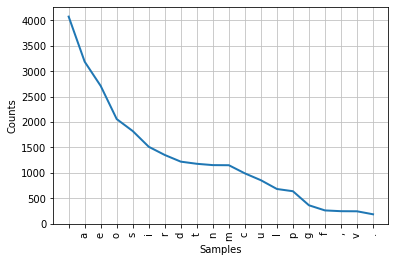

In [98]:
print("Tokens LEMM")
plot_frequencia_tokens(token_lemm)

# Extra: Outras bibliotecas para pré-processamento

## Texhero

https://texthero.org/

In [ ]:
!pip install texthero==1.0.9

In [ ]:
import texthero as hero
import pandas as pd

In [ ]:
texto = \
"""A história      do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. 
Fonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural """

In [ ]:
texto

'A história      do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. \nFonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural '

In [ ]:
texto = pd.Series(texto)

In [ ]:
#Aplica tokenização
hero.tokenize(texto).values[0]

['A',
 'história',
 'do',
 'PLN',
 '(',
 'Processamento',
 'de',
 'linguagem',
 'Natural',
 ')',
 'começou',
 'na',
 'década',
 'de',
 '1950',
 ',',
 'quando',
 'Alan',
 'Turing',
 'publicou',
 'o',
 'artigo',
 'Computing',
 'Machinery',
 'and',
 'Intelligence',
 '.',
 'Fonte',
 ':',
 'https',
 ':',
 '/',
 '/',
 'pt.wikipedia.org/wiki/Processamento',
 '_',
 'de',
 '_',
 'linguagem',
 '_',
 'natural']

In [ ]:
#Remove numeros
hero.remove_digits(texto).values[0]

'A história      do PLN (Processamento de linguagem Natural) começou na década de  , quando Alan Turing publicou o artigo Computing Machinery and Intelligence. \nFonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural '

In [ ]:
#Remove pontuação
hero.remove_punctuation(texto).values[0]

'A história      do PLN  Processamento de linguagem Natural  começou na década de 1950  quando Alan Turing publicou o artigo Computing Machinery and Intelligence  \nFonte  https pt wikipedia org wiki Processamento de linguagem natural '

In [ ]:
#Remove parênteses
hero.remove_brackets(texto).values[0]

'A história      do PLN  começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. \nFonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural '

In [ ]:
#Remove espaços em brancos
hero.remove_whitespace(texto).values[0]

'A história do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. Fonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural'

In [ ]:
#Remove stopwords
portugues_stops = stopwords.words('portuguese')
hero.remove_stopwords(texto, portugues_stops).values[0]

'A história       PLN (Processamento  linguagem Natural) começou  década  1950,  Alan Turing publicou  artigo Computing Machinery and Intelligence. \nFonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural '

In [ ]:
#Remove URL
hero.remove_urls(texto).values[0]

'A história      do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. \nFonte:   '

## Clean-Text

https://github.com/jfilter/clean-text

In [ ]:
!pip install clean-text==0.4.0

     |████████████████████████████████| 194kB 30.0MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
  Created wheel for emoji: filename=emoji-1.4.0-cp37-none-any.whl size=186501 sha256=33c8809838b4cb1dfd7b06631f5057512e5f1b26662cf15e602fa21c5b339d78
  Stored in directory: /root/.cache/pip/wheels/31/c2/7e/a1649e4a71d6967ba58a76db3d3f23b6e94c82391ffa1f531c
  Created wheel for ftfy: filename=ftfy-6.0.3-cp37-none-any.whl size=41935 sha256=e2acb2c7c91fdd07336bf919995a12235fac9710e3c0878d48b901a30dd2cae5
  Stored in directory: /root/.cache/pip/wheels/99/2c/e6/109c8a28fef7a443f67ba58df21fe1d0067ac3322e75e6b0b7
Successfully built emoji ftfy


In [ ]:
from cleantext import clean

In [ ]:
texto = \
"""A história      do PLN (Processamento de linguagem Natural) começou na década de 1950, quando Alan Turing publicou o artigo Computing Machinery and Intelligence. 
Fonte: https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural """

In [ ]:
clean(texto,
    fix_unicode=True,              
    to_ascii=True,                 
    lower=True,                    
    no_line_breaks=False,
    no_urls=True,
    no_emails=False,     
    no_phone_numbers=False,
    no_numbers=True,      
    no_digits=True,       
    no_currency_symbols=False, 
    no_punct=True,          
    replace_with_punct="",
    replace_with_url="<URL>",
    replace_with_email="<EMAIL>",
    replace_with_phone_number="<PHONE>",
    replace_with_number="<NUMBER>",
    replace_with_digit="0",
    replace_with_currency_symbol="<CUR>",
    lang="pt"
)

'a historia do pln processamento de linguagem natural comecou na decada de <number> quando alan turing publicou o artigo computing machinery and intelligence\nfonte <url>'